# Task 1: Data Cleaning Process

Import libraries

In [81]:
import pandas as pd
from scipy.stats import zscore
from scipy.stats import zscore, norm
from scipy.stats.mstats import winsorize
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

### **Purpose of Libraries:**

1. **`pandas`**:
   - Provides tools for **data manipulation** and analysis.
   - Ideal for working with datasets in **tabular format** (rows and columns).

2. **`NumPy`**:
   - Supports **numerical computations** and operations on arrays.
   - Used for mathematical functions and efficient handling of numerical data.

3. **`Seaborn`**:
   - A **data visualization library** built on top of Matplotlib.
   - Makes it easier to create **statistical plots** such as box plots, heatmaps, and more.

4. **`zscore`** (from `scipy.stats`):
   - A function used to **standardize numerical data** by converting it to Z-scores.
   - Helps in identifying **outliers** by measuring how far a value is from the mean in terms of standard deviations.

5. **`winsorize`**:
   - A function used to **limit extreme values** (outliers) in numerical data.
   - Adjusts data by replacing outliers with values closer to the range limits, instead of removing them.

---

## a) Examine the dataset for missing values and inconsistencies.

Missing values and inconsistencies are checked using pandas.isnull() method

In [82]:
url = 'https://raw.githubusercontent.com/qs220a/spProject/refs/heads/main/scenarioDatasetEdited.csv'

df = pd.read_csv(url)
df.info()    # Check the status of the dataframe, indicate if any missing values exist

print("\n")

# Check how many missing values exist in each columns
print(df.isnull().sum())

# Display the row with missing values in each columns
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

# Replace missing value by using interpolation method, update dataframe
df = df.interpolate()
df.to_csv('interpolatedDataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   matrix_number      100 non-null    object 
 1   attendance_rate    100 non-null    float64
 2   study_hours        98 non-null     float64
 3   assignment_scores  98 non-null     float64
 4   final_exam_score   100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


matrix_number        0
attendance_rate      0
study_hours          2
assignment_scores    2
final_exam_score     0
dtype: int64
   matrix_number  attendance_rate  study_hours  assignment_scores  \
14         M1014            67.27          NaN               50.8   
15         M1015            67.34          NaN               96.4   
24         M1024            78.24          7.2                NaN   
28         M1028            83.70          9.7                NaN   

    final_exam_score  
14        

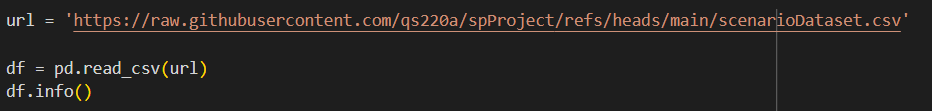





### **Purpose:**

1. **Fetching the Dataset**:
   - The dataset is fetched directly from the provided **URL** and loaded into a DataFrame (`df`) using:
     ```python
     pd.read_csv()
     ```
   - This step prepares the dataset for further analysis.

2. **Basic Dataset Information**:
   - **`df.info()`**:
     - Displays essential information about the dataset, including:
       - **Number of rows and columns**.
       - **Data types** of each column.
       - **Count of non-null values** in each column (to check for missing data).

---

image.png



### Missing Values in a DataFrame

Missing values can be identified using the function:

TF = df.isnull()

- The function returns a DataFrame of the same size, where each element is:
  - **True**: If the value is missing.
  - **False**: If the value is not missing.

- Missing values are defined according to the data type:
  - **NaN** — For numeric types (e.g., float, int).
  - **NaT** — For datetime types.
  - **None** — For object types (e.g., strings).
  - **pd.NA** — For new nullable integer or string types.

  ---

### Explanation of Output
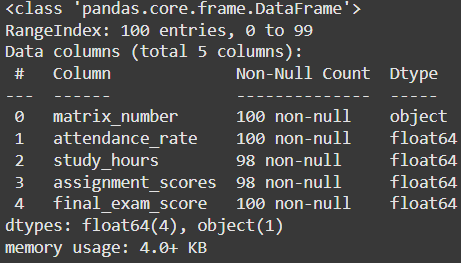

#### Step 1: df.info()

The `info()` method provides a summary of the DataFrame's structure.  
Here is the breakdown of the output:

1) **RangeIndex: 100 entries, 0 to 99**  
   - The dataset has 100 rows of data (indices range from 0 to 99).  

2) **Data Columns: 5 columns**  
   - The dataset contains 5 columns of data.  

   - **Non-Null Count**:  
     - All columns contain 100 non-null entries, meaning there are no missing values in the dataset.  

   - **Dtype (Data Type)**:  
     - `object`: Represents text or categorical data.  
       Example: `matrix_number` is of type `object`, likely representing an identifier or code.  
     - `float64`: Represents numerical data (decimal numbers).  
       Example: `attendance_rate`, `study_hours`, `assignment_scores`, and `final_exam_score` are numerical columns.  


---


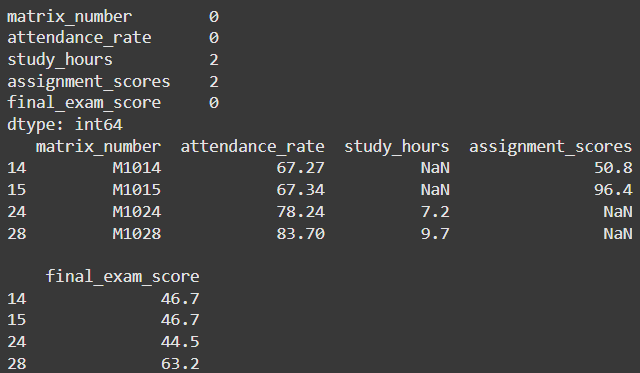

#### Step 2: Identifying Missing Values with Outliers

The dataset has missing values in the `study_hours` and `assignment_scores` columns, as shown in the table:

**Summary of Missing Data:**
- **`matrix_number`**: 0 missing values.
- **`attendance_rate`**: 0 missing values.
- **`study_hours`**: 2 missing values.
- **`assignment_scores`**: 2 missing values.
- **`final_exam_score`**: 0 missing values.


**Detailed Table with Missing Data:**

| matrix_number | attendance_rate | study_hours | assignment_scores | final_exam_score |
|---------------|-----------------|-------------|-------------------|------------------|
| M1014         | 67.27          | NaN         | 50.8             | 46.7            |
| M1015         | 67.34          | NaN         | 96.4             | 46.7            |
| M1024         | 78.24          | 7.2         | NaN              | 44.5            |
| M1028         | 83.70          | 9.7         | NaN              | 63.2            |


**Observations:**
1. The `study_hours` column has missing values for `matrix_number` M1014 and M1015.  
2. The `assignment_scores` column has missing values for `matrix_number` M1024 and M1028.  
3. No missing values are found in `attendance_rate`, `matrix_number`, or `final_exam_score`.  

This updated dataset highlights the need for handling missing data in the two affected columns.

---


#### Step 3: Handling Rows with Missing Values and Interpolation
1. Identify Rows with Missing Values

* The following code identifies and displays all rows in the DataFrame that contain missing values:

```python
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

```

* `df.isna()` generates a boolean DataFrame where True indicates a missing value.
* `any(axis=1)` checks each row to see if it contains any True values (i.e., missing data).
* `df[df.isna().any(axis=1)]` filters and returns only the rows with missing values.

2. Handle Missing Values with Interpolation
To fill in missing values, we use the interpolation method:

```python
df = df.interpolate()
```

* Interpolation estimates the missing values based on surrounding data.
* For numerical columns, it fills missing values using methods like linear interpolation.

3. Export the Updated DataFrame

* Save the updated DataFrame with interpolated values to a CSV file:

```python
df.to_csv('interpolatedDataset.csv', index=False)
```
* The `to_csv()` function saves the DataFrame as a CSV file.
* `index=False` ensures that the index is not written to the file.

---


**Result of Interpolation**

**Output Before Interpolation**
   - Rows with missing values:

| matrix_number | attendance_rate | study_hours | assignment_scores | final_exam_score |
|---------------|-----------------|-------------|-------------------|------------------|
| M1014         | 67.27          | NaN         | 50.8             | 46.7            |
| M1015         | 67.34          | NaN         | 96.4             | 46.7            |
| M1024         | 78.24          | 7.2         | NaN              | 44.5            |
| M1028         | 83.70          | 9.7         | NaN              | 63.2            |

**Output After Interpolation**
- Rows after filling missing values using interpolation:

| matrix_number | attendance_rate | study_hours | assignment_scores | final_exam_score |
|---------------|-----------------|-------------|-------------------|------------------|
| M1014         | 67.27          | 10.2         | 50.8             | 46.7            |
| M1015         | 67.34          | 9.4         | 96.4             | 46.7            |
| M1024         | 78.24          | 7.2         | 71.8              | 44.5            |
| M1028         | 83.70          | 9.7         | 69.85              | 63.2            |


**Key Notes:**
1. Before Interpolation:

* study_hours and assignment_scores columns contain NaN (missing values).
2. After Interpolation:

* Missing values are filled using linear interpolation.
* study_hours and assignment_scores values are estimated based on neighboring rows.


**Why use Interpolation ?**

Interpolation is a method used to estimate missing values in a dataset by calculating values based on surrounding known data points. It works differently depending on the type of interpolation used. In this case (default linear interpolation in pandas), the method:

1. Linear Interpolation:

* Missing values are filled by linearly estimating them based on the values directly before and after the missing data.
* The assumption is that the data changes at a constant rate between known points.
2. Example From the Dataset:

* For the column `study_hours`, the missing values in rows `M1014` and `M1015` were estimated as 10.2 and 9.4 by averaging the values 11.0 (`M1013`) and 8.6 (`M1016`).
* Similarly, for the column `assignment_scores`, the missing values in rows M1024 and M1028 were interpolated based on surrounding known values in the column.
3. Key Advantages:

* It provides a smooth and realistic estimation of missing values.
* It works well when the missing values are surrounded by sufficient data points.

## b) Detect the outliers

In [83]:
# Select columns required for detection
detection_cols = ['study_hours', 'assignment_scores', 'final_exam_score']

Purpose:

* detection_cols: A list of columns to check for outliers (study_hours, assignment_scores, final_exam_score).

### Z-Score Method

In [84]:
# Detect Outliers with Z-Score method
# Calculate Z-Scores
z_scores = df[detection_cols].apply(zscore)

# Define Z-Score Threshold
z_threshold = 2

# Identify outliers
z_outliers = z_scores[(z_scores.abs() > z_threshold)]

# Display but removes rows where all values are NaN (i.e., no outliers in any column for that row).
print("Z-Score Outliers:\n", z_outliers.dropna(how='all'))

Z-Score Outliers:
     study_hours  assignment_scores  final_exam_score
3     -2.203455                NaN               NaN
6           NaN                NaN         -3.281562
29          NaN                NaN         -2.908170
30     2.121394                NaN               NaN
34    -2.092562                NaN               NaN
37     2.731309                NaN               NaN
43          NaN                NaN          2.042731
49     2.454075                NaN               NaN
50          NaN                NaN          2.346976
80     2.065947                NaN               NaN
91     2.121394                NaN               NaN


#### Detecting Outliers Using Z-Score Method

` zscore()`: The zscore function computes Z-scores for every value in each column.

Example: For a column 𝑋, `zscore()` computes:

The formula for the z-score is:

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- (x): The individual data point for which the z-score is calculated.
- (μ): The mean (average) of the dataset.
- (σ): The standard deviation of the dataset.


Output of `z_scores`:

* A DataFrame with Z-scores for each value in the specified columns (`study_hours`, `assignment_scores`, `final_exam_score`).


**Code Explanation:**

1)  `df[detection_cols].apply(zscore)`:


* Applies the zscore function to the selected columns.
Returns a DataFrame of Z-scores.

2) `z_thresold=2`

*  Threshold value is defined as `2`.
*  This threshold suggests that data points with Z-scores greater than 2 or less than -2 are considered unusual or outliers. In other words, they are significantly different from the mean (average) of the dataset. This threshold is often used in practice for detecting moderate outliers.

2)  `(z_scores.abs() > z_thresold)`:


* Flags rows where the absolute Z-score exceeds `z_thresold`.


3)  `z_outliers.dropna(how='all')`:


* Displays rows where at least one column contains a Z-score outlier (non-NaN).

**Key Notes:**
* Threshold Selection:
  * A Z-score threshold of 2 captures data points 2 standard deviations away from the mean. Adjust the threshold if needed to detect more or fewer outliers.
* Output:
  * Displays only rows and columns where outliers are detected. Non-outlier values appear as NaN.



#### Handle the outliers by implementing Winsorisation
**Winsorization** is the process of replacing the exterme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data.

In [85]:
# Convert Z-Score Thresholds to Percentiles using the standard distribution table
lower_limit = (1 - norm.cdf(z_threshold))  # Lower tail proportion
upper_limit = norm.cdf(z_threshold)       # Upper tail proportion

# Apply Winsorization for Each Column
for col in detection_cols:
    df[col] = winsorize(df[col], limits=(lower_limit, 1 - upper_limit))

# Save a copy of winsorised dataset
df.to_csv('winsorisedDataset.csv', index=False)

##### Step 1: Import library

```python
from scipy.stats import norm
from scipy.stats.mstats import winsorize
```

* `scipy.stats.norm`: Provides the cumulative distribution function (CDF) for the standard normal distribution.


* `scipy.stats.mstats.winsorize`: Used to Winsorize a dataset, capping extreme values at specified percentiles.

##### Step 2: Define Z-Score Threshold

```python
z_threshold = 2
```

* Sets the threshold for identifying outliers.
* Any data point with a Z-Score beyond this threshold (above `2` or below `-2`) is considered an outlier.

##### Step 3: Convert Z-Score Threshold to Percentiles

```python
lower_limit = (1 - norm.cdf(z_threshold))  # Lower tail proportion
upper_limit = norm.cdf(z_threshold)       # Upper tail proportion
```
* `norm.cdf(z_threshold)`: Calculates the cumulative probability up to the Z-Score threshold using the standard normal distribution.
* Lower Limit: Proportion of data below the threshold (Z < `-2`).
* Upper Limit: Proportion of data above the threshold (Z > `2`).
* For `z_threshold = 2`:
  * Lower limit ≈ `2.28%`.   [`1-(norm.cdf(2)≈0.0228`]
  * Upper limit ≈ `97.72%`.   [(`norm.cdf(2)≈0.9772`)]

##### Step 4: Apply Winsorization

```python
detection_cols = ['attendance_rate', 'study_hours', 'assignment_scores', 'final_exam_score']

for col in detection_cols:
    df[col] = winsorize(df[col], limits=(lower_limit, 1 - upper_limit))
```

* detection_cols: Specifies the columns to Winsorize.
* winsorize(df[col], limits=(lower_limit, 1 - upper_limit)):
  * Adjusts values below the lower limit to the `2.28th percentile`.
  * Adjusts values above the upper limit to the `97.72nd percentile`.
* Applies Winsorization for all specified columns (`attendance_rate`, `study_hours`, `assignment_scores`, `final_exam_score`).

##### Step 5: Save the Winsorized Dataset

```python
df.to_csv('winsorisedDataset.csv', index=False)
```
* Saves the Winsorized dataset as a CSV file named winsorisedDataset.csv.
* The file is saved in the current working directory.



**Result before and after using Winsorisation:**

Before using Winsorisation:

| Index |	Study Hours |	Assignment Scores |	Final Exam Score |
|---------------|--------------|---------------|--------------|
|3	 |6.0	 |NaN	 |53.8 |
 |6	 |NaN	 |NaN	 |26.9|
 |29	 |NaN	 |NaN	 |29.6 |
 | 30	 |13.8 |	NaN	 |NaN |
 |34	 |6.2	 |NaN	 |NaN |
 |37	 |14.9	 |NaN	 |NaN |
 |43	 |NaN	 |NaN	 |65.4 |
 |49	 |14.4 |	NaN |	NaN |
 |50	 |NaN	 |NaN	 |67.6 |
 |80	 |13.7	 |NaN |	NaN |
 |91	 |13.8	 |NaN	 |NaN |


 After using Winsorisation:


| Index |	Study Hours |	Assignment Scores |	Final Exam Score |
|---------------|--------------|---------------|--------------|
|3	 |6.8	 |NaN	 |53.8 |
 |6	 |NaN	 |NaN	 |37.0 |
 |29	 |NaN	 |NaN	 |37.0 |
 | 30	 |13.8 |	NaN	 |NaN |
 |34	 |6.8	 |NaN	 |NaN |
 |37	 |13.8	 |NaN	 |NaN |
 |43	 |NaN	 |NaN	 |63.2 |
 |49	 |13.8 |	NaN |	NaN |
 |50	 |NaN	 |NaN	 |63.2 |
 |80	 |13.7	 |NaN |	NaN |
 |91	 |13.8	 |NaN	 |NaN |



<p style="page-break-after:always;"></p>

# Task 2: Descriptive Data Analysis

Import libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## a) Mean, Median, Mode and Standard Deviation

In [87]:
# Calculate mean, median, mode, and standard deviation for each column
ddadf = df.drop(columns=["matrix_number"])

mean = ddadf.mean()
median = ddadf.median()
mode = ddadf.mode().iloc[0]  # mode() returns a DataFrame, so we take the first row
std_dev = ddadf.std()

# Display the results

statistics = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Standard Deviation': std_dev
})

print(statistics)

                      Mean  Median   Mode  Standard Deviation
attendance_rate    78.8073  78.565  66.24           11.899838
study_hours         9.9710  10.100  10.50            1.743113
assignment_scores  76.4495  77.050  51.30           14.251921
final_exam_score   50.7380  51.350  37.00            6.669420


### EXPLANATIONS:

**1. Attendance Rate:**

- **Mean (78.81%)**: On average, students attended 78.81% of classes.  
- **Median (78.57%)**: Half of the students had an attendance rate above 78.57% and half below.  
- **Mode (66.24%)**: The most frequent attendance rate recorded was 66.24%.  
- **Standard Deviation (11.90)**: There's moderate variation in attendance rates; some students likely had very low or very high attendance.  

---

**2. Study Hours:**

- **Mean (9.97 hours)**: On average, students studied about 9.97 hours.  
- **Median (10.10 hours)**: Half of the students studied more than 10.10 hours and half less.  
- **Mode (10.50 hours)**: The most common study time is 10.50 hours.  
- **Standard Deviation (1.74)**: Low variation in study hours suggests that most students study within a small range of hours.  

---

**3. Assignment Scores:**

- **Mean (76.45)**: The average assignment score is 76.45, which is quite decent.  
- **Median (77.05)**: Half the students scored above 77.05 and half below.  
- **Mode (51.30)**: A significant number of students scored 51.30.  
- **Standard Deviation (14.25)**: High variation indicates that while some students scored very well, others performed poorly.  

---

**4. Final Exam Scores:**

- **Mean (50.74)**: The average final exam score is 50.74, which is low.  
- **Median (51.35)**: Half of the students scored below 51.35.  
- **Mode (37.00)**: The most frequent score was quite low, which is 37.00.  
- **Standard Deviation (6.67)**: Relatively low variability indicates that most scores cluster around the mean.  



## b) Perform a bivariate analysis

In [88]:
# Compute correlation coefficients
correlations = df[['attendance_rate', 'study_hours', 'final_exam_score']].corr()

# Display the correlation matrix
print(correlations)


                  attendance_rate  study_hours  final_exam_score
attendance_rate          1.000000    -0.123792          0.434918
study_hours             -0.123792     1.000000          0.020601
final_exam_score         0.434918     0.020601          1.000000


### Graphical representation of bivariate analysis

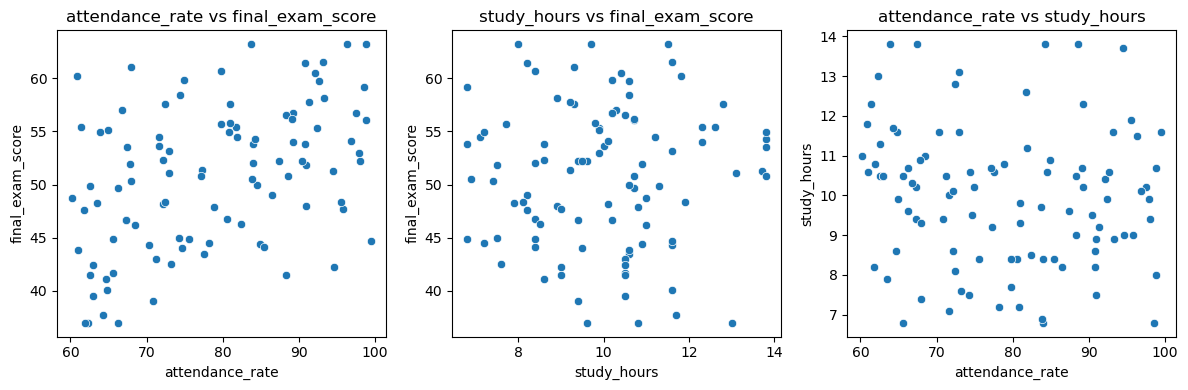

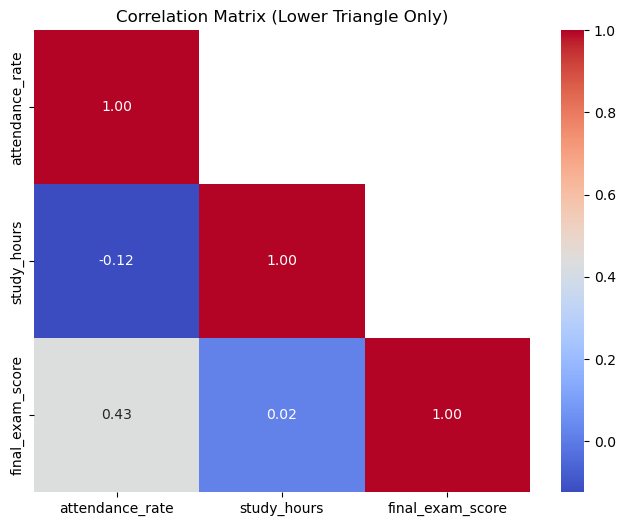

In [89]:
# Pairwise scatter plots
# Define variable pairs
pairs = [
    ('attendance_rate', 'final_exam_score'),
    ('study_hours', 'final_exam_score'),
    ('attendance_rate', 'study_hours')
]

# Create scatter plots
plt.figure(figsize=(12, 4))  # Adjust size for better layout
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

# Heatmap of correlation matrix
# Compute correlation matrix
correlation_matrix = df[['attendance_rate', 'study_hours', 'final_exam_score']].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Lower Triangle Only)")
plt.show()


**EXPLANATIONS:**
---

**1. Attendance Rate vs. Final Exam Score (Correlation = 0.43)**
- **Form**: The plot shows a weak tendency for higher attendance rates to align with higher exam scores.
- **Direction**: The direction is positive, meaning as attendance rates increase, final exam scores tend to increase slightly.
- **Strength**: The relationship is moderate, as the points are widely scattered but sligthly follow a specific trend.
- **Interpretation**: The correlation coefficient of 0.43 indicates a moderate positive relationship between attendance rate and final exam score.
- **Explanation**: Students with higher attendance rates tend to achieve better final exam scores, but the relationship is not strong. While attendance might contribute to better scores, other factors could also influence performance.
- **Conclusion**: Regular attendance has a positive impact on exam scores, but it is not the sole determinant.

---

**2. Study Hours vs. Final Exam Score (Correlation = 0.02)**
- **Form**: There is no clear form in the data, as the points appear randomly distributed without an obvious trend or pattern.
- **Direction**: No evident direction (neither positive nor negative), indicating that study hours do not correlate strongly with final exam scores.
- **Strength**: The relationship is very weak or nonexistent, as the points are widely dispersed without any clustering or trend.
- **Interpretation**: The correlation coefficient of 0.02 suggests an extremely weak or negligible relationship between study hours and final exam score.
- **Explanation**: This finding indicates that the number of hours spent studying does not directly correlate with better exam performance. Quality of study or other external factors (e.g., methods, content understanding) might be more critical.
- **Conclusion**: Time spent studying is not a reliable predictor of exam performance based on this data.

---

**3. Attendance Rate vs. Study Hours (Correlation = -0.12)**
- **Form**: The plot shows no apparent linear or non-linear form, with points scattered across the graph.
- **Direction**: No clear direction (neither positive nor negative) is visible, suggesting no meaningful relationship between attendance rate and study hours.
- **Strength**: The relationship is weak or nonexistent, as the points are dispersed without forming any pattern.
- **Interpretation**: The correlation coefficient of -0.12 suggests a very weak negative relationship between attendance rate and study hours.
- **Explanation**: This weak negative trend might imply that students who attend classes more regularly tend to study slightly less independently, or it could indicate an unrelated association due to other factors.
- **Conclusion**: Attendance rate and study hours are almost independent of each other, and the negative correlation is not substantial enough to draw strong conclusions.

---

**Overall:**
The correlation coefficients confirm the findings from the scatter plots:
1. Attendance rate is moderately related to final exam scores.
2. Study hours have virtually no impact on exam performance.
3. Attendance rate and study hours are nearly independent.

<p style="page-break-after:always;"></p>

# Task 3: Data Visualization

Import libraries

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## a) Histogram/Box Plots

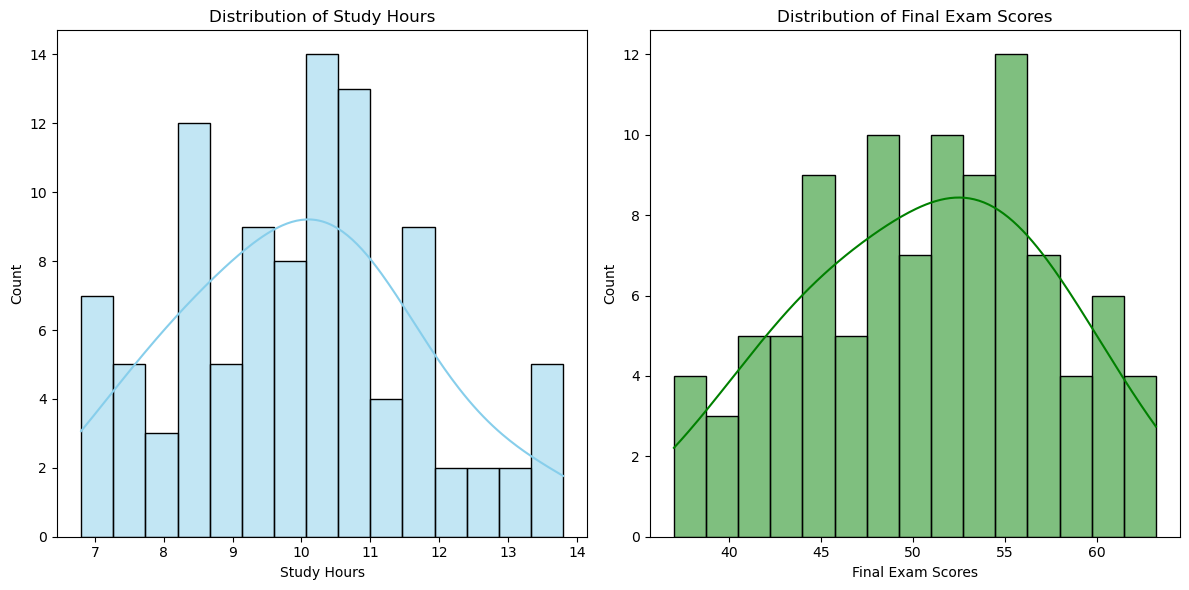

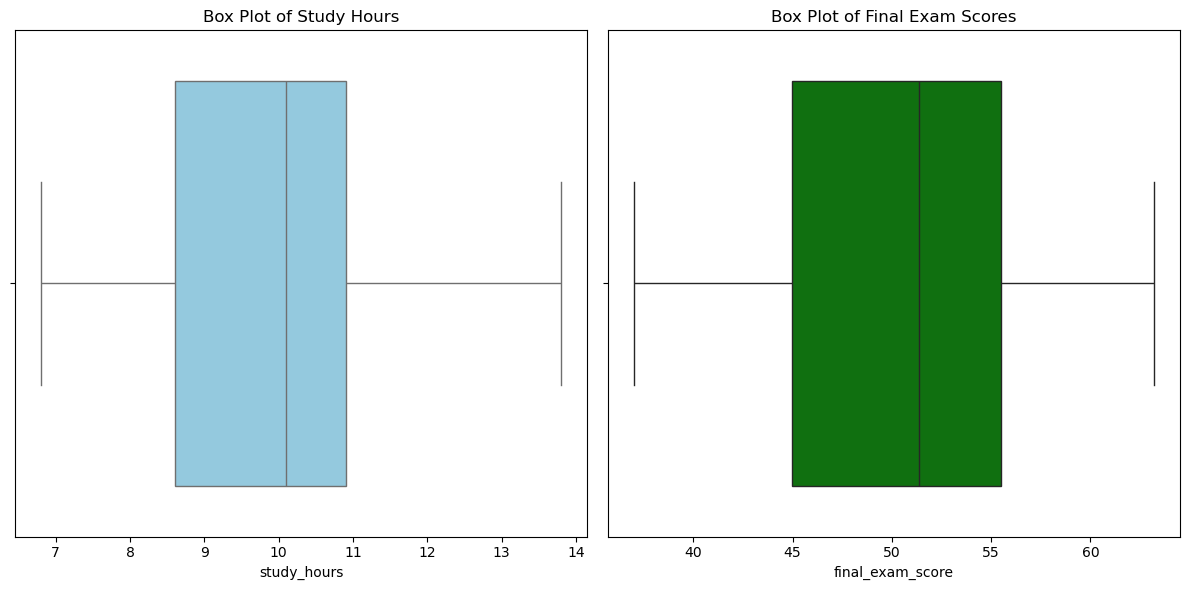

In [91]:
# Histograms
plt.figure(figsize=(12, 6))

# Study Hours
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='study_hours', kde=True, bins=15, color='skyblue', kde_kws={'bw_adjust': 1.5})
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')

# Final Exam Scores
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='final_exam_score', kde=True, bins=15, color='green', kde_kws={'bw_adjust': 1.5})
plt.title('Distribution of Final Exam Scores')
plt.xlabel('Final Exam Scores')

plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 6))

# Study Hours
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='study_hours', color='skyblue')
plt.title('Box Plot of Study Hours')

# Final Exam Scores
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='final_exam_score', color='green')
plt.title('Box Plot of Final Exam Scores')

plt.tight_layout()
plt.show()


**EXPLANATION**
---
**1. Study Hours**

  **a. Histogram:**

- The majority of students study between 8 to 12 hours, with the peak frequency at 10 hours. The distribution is slightly right-skewed, indicating fewer students study more than 12 hours.

**b. Box plot:**
  - The median study time is 10 hours, with a narrow IQR, suggesting that most students have consistent study habits. No outliers are observed, indicating that the data is fairly uniform.

  
**2. Final Exam Scores**

**a. Histogram:**

 - The distribution of final exam scores is approximately normal, with most students scoring between 45 and 60, and a mode around 50–55. There are a few exceptionally high (>60) and low (<40) scores, though they are relatively rare.

>

**b. Box Plot:**

 - The median score is approximately 52, with a moderate spread of scores. Outliers are present, representing students who significantly overperformed or underperformed relative to the group.


---

**PATTERNS AND TRENDS**

**1. Study Hours :**

  -  The data suggests a consistent study routine among students, as indicated by the narrow spread of hours and absence of outliers. However, a minority of students put in extra hours beyond 12, showing variability in individual study approaches.

**2. Final Exam Scores:**

 - The scores display a balanced normal distribution, with the majority clustering near the median. Outliers on both ends reflect individual differences, such as natural aptitude, external factors, or preparation strategies.

**3. No DIrect Relationship:**

-  The graphs do not provide information about the relationship between study hours and exam scores. To evaluate a potential connection, additional data visualization (e.g., scatterplot) or statistical measures (e.g., correlation coefficient) would be required.




---
**Conclusion**

Both variables, study hours and final exam scores exhibit consistent patterns independently. However, no conclusion about their relationship can be drawn from the provided graphs. Further analysis with paired data is essential to explore how study hours influence exam performance.












## b) Scatter Plot Matrix

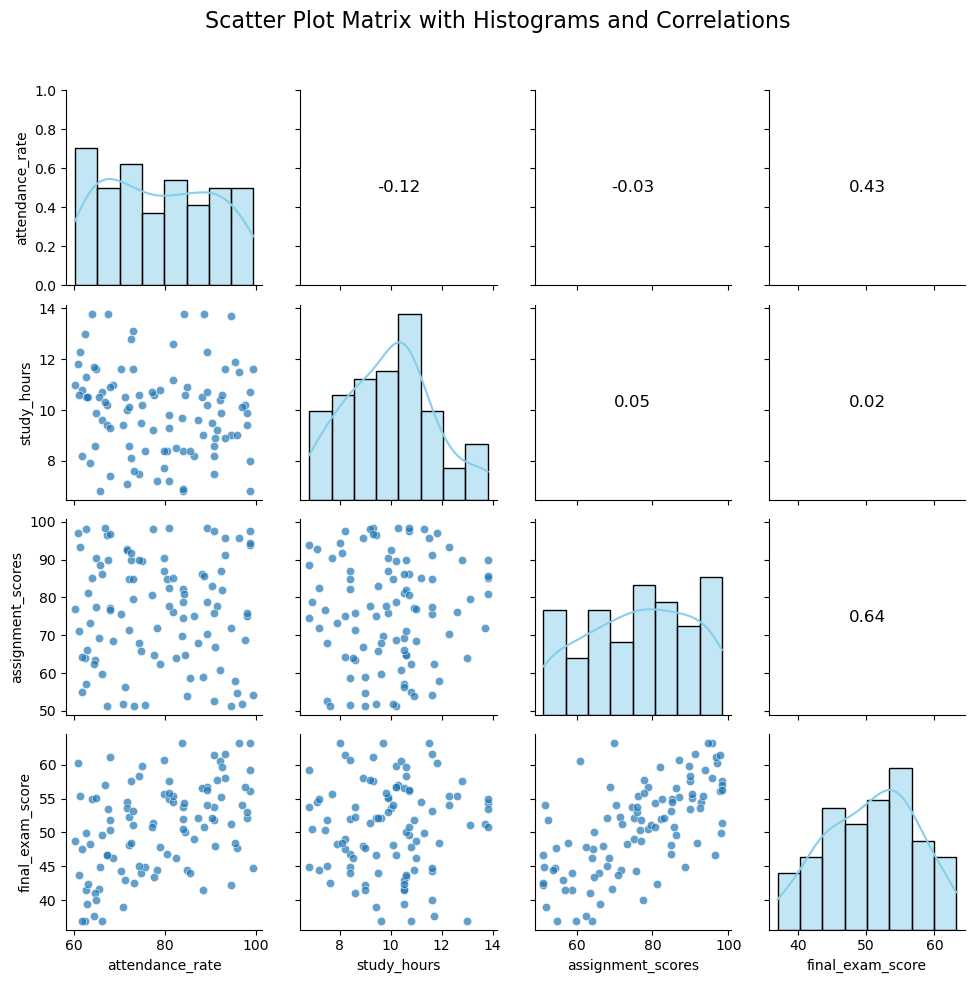

In [92]:
# Define variables
variables = ['attendance_rate', 'study_hours', 'assignment_scores', 'final_exam_score']
data_subset = df[variables]

# Create a PairGrid
g = sns.PairGrid(data_subset)

# Lower triangle: Scatter plots
g.map_lower(sns.scatterplot, alpha=0.7)

# Diagonal: Histograms
g.map_diag(sns.histplot, kde=True, color='skyblue')

# Upper triangle: Correlation values
def corr_func(x, y, **kwargs):
    corr = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'{corr:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=12, color='black')
g.map_upper(corr_func)

# Adjust title and layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatter Plot Matrix with Histograms and Correlations", fontsize=16)
plt.show()

**EXPLANATION**


**1. Attendance Rate vs Final Exam Scores (Correlation: 0.43):**

  - A moderate positive correlation , indicating that students with higher attendance rates tend to score better in final exams. However, this relationship is not very strong, suggesting other factors also play a role in final exam performance.

**2. Assignment Scores vs Final Exam Scores (Correlation: 0.64):**

  - A strong positive correlation. This indicates that students who perform well in assignments are more likely to achieve higher scores in their final exams.

**3. Study Hours vs Final Exam Scores (Correlation: 0.02):**

  - There is almost no correlation between study hours and final exam scores. This implies that study hours alone do not significantly impact performance, emphasizing the importance of other factors like effective study methods or assignment completion.

**4. Attendance Rate vs Study Hours (Correlation: -0.03):**

  - A weak negative correlation, indicating no meaningful relationship between attendance rate and the number of study hours.

**5. Assignment Scores vs Study Hours (Correlation: 0.05):**

  - A weak positive correlation indicates that students who study more may slightly perform better in assignments, but the relationship is almost negligible.



<p style="page-break-after:always;"></p>

# Task 4: Predictive Analysis

Import libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score

## a) Linear Regression Model

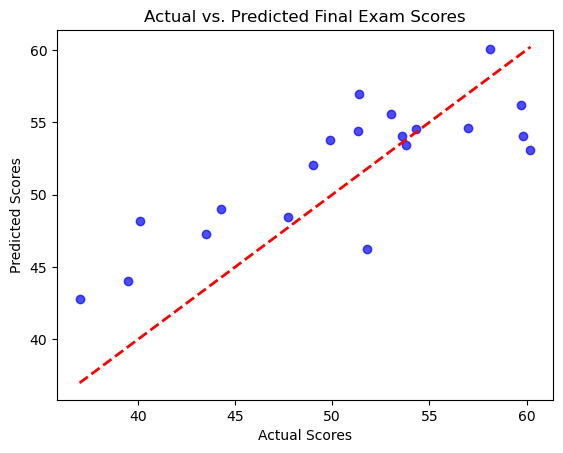

In [94]:
# ===========================================================
# Data Cleaning Process
# ===========================================================

# ===========================================================
# Data Integration Process
# Combine relevant columns into a single dataframe
# ===========================================================

# Ensure that the relevant columns are numeric
padf = df[['attendance_rate', 'study_hours', 'assignment_scores', 'final_exam_score']].apply(pd.to_numeric, errors='coerce')

# ===========================================================
# ===========================================================

# Drop rows with missing values (if any)
padf = padf.dropna()

# ===========================================================
# ===========================================================


# ===========================================================
# Data Transformation Porcess
# ===========================================================

# Define predictors (X) and target (y)
X = padf[['attendance_rate', 'study_hours', 'assignment_scores']]
y = padf['final_exam_score']

# ===========================================================
# Data Reduction Process
# ===========================================================

# Split the df into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===========================================================
# ===========================================================

# Use RobustScaler to handle potential outliers
scaler = RobustScaler()

# Fit the scaler on training df and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===========================================================
# ===========================================================


# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)


plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs. Predicted Final Exam Scores")
plt.show()



### Why use linear regression model?

Predicts Continuous Outcomes
 * Linear regression is ideal for predicting continuous variables like final exam scores, where there's a linear relationship between the predictors (e.g., study_hours, attendance_rate) and the target.

Simplicity and Interpretability
* It provides a simple model that’s easy to understand, with coefficients that clearly show the impact of each predictor on the target variable.

Efficient and Fast
* Linear regression is computationally efficient and works well with smaller datasets, making it a quick and effective model to train and evaluate.

### Machine Learning
* Training Phase:
Input: Attendance rate, study hours, and past scores.
Output: Final exam score.
From the training, the model learns a direct correlation; when study hours or attendance increases, scores increase.
* Validation Phase:
a validation set will be established. The validation will check how well the model predicts scores for unseen data.
* Testing Phase:
 the final model will be evaluated on a testing set to ensure its solid performance on completely unseen data.

#### Step 1: Handle the missing value
```python
padf = df[['attendance_rate', 'study_hours', 'assignment_scores', 'final_exam_score']].apply(pd.to_numeric, errors='coerce')
padf = padf.dropna()
```
Data Cleaning Process
* Is to ensure the data quality by handing missing value

* `('attendance_rate', 'study_hours', 'assignment_scores', 'final_exam_score') `are converted to numeric values. Non-numeric entries are replaced to NaN.
* Rows containing NaN values are removed to ensure the dataset is complete for training.

Data Integration Process


* Prepares the dataset (padf) as a clean, integrated dataframe for further processing.


* To ensure the data is focused on the key variables needed for analysis or modeling.
* By integrating only relevant data, we reduce unnecessary complexity.

#### Step 2: Define Predictors and Target
```python
X = padf[['attendance_rate', 'study_hours', 'assignment_scores']]
y = padf['final_exam_score']
```
Data Transformation Process
* To separates the dataset into independent variables (predictors, X) and the dependent variable (target, y).
* X includes attendance_rate, study_hours, and assignment_scores as predictors.
* Y represents final_exam_score, the value to be predicted.
* Prepares the data for machine learning by separating the input (predictors) from the output (target).

#### Step 3: Split Data into Training and Testing Sets
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
Data Reduction Process
* Separates data for unbiased testing and validation after the model is trained
* Divides the dataset into training (80%) and testing (20%) subsets to evaluate the model's performance on unseen data.
* X_train and y_train: Used to train the model.
* X_test and y_test: Reserved for validation/testing to evaluate predictive performance.
* `random_state=42` ensures reproducibility of results.

What is`random_state`?
* Many machine learning operations, such as splitting data into training and testing sets, rely on random processes.
* The random_state is a seed value that initialize the random number generator.
* By specifying a random_state, we ensure that the random number generator produces the same sequence of "random" numbers every time the code is running.

Why 80/20 Is a Good Default?

* 80% of data is used for training the model, which is typically enough for the model to learn the underlying patterns in the data.
With 80% of the data, the model has enough examples to generalize and learn the relationships between the predictors (independent variables) and the target (dependent variable).
If you use too much data for training (e.g., 90%), the model might memorize the training data and perform poorly on the test set. In this case, the model becomes overfitted
* With 20% of the data, you have enough data to get a reliable estimate of the model's accuracy, precision, recall, or other performance metrics.
If the testing data is too small (e.g., 5-10%), the evaluation might not be statistically significant, leading to a misleading assessment of model performance.

#### Step 4: Scale the Predictors
```python
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

* Handles outliers and ensures predictors are on a similar scale to improve the model's performance.
* RobustScaler scales data using the median and interquartile range, making it robust to outliers.
* fit_transform is apply to the training data, while transform is applied to the test data to prevent data leakage.

#### Step 5: Train the Linear Regression Model
```python
model = LinearRegression()
model.fit(X_train_scaled, y_train)
```
* Fits the linear regression model to the training data.
* fit learns the coefficients (
𝛽
0
,
𝛽
1
,
𝛽
2
 ) for the predictors by minimizing the prediction error on the training data.

#### Step 6: Make Predictions
```python
y_pred = model.predict(X_test_scaled)
```
* Uses the trained model to predict final exam scores for the test dataset.

#### Step 7: Visualize Predictions
```python
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs. Predicted Final Exam Scores")
plt.show()
```

* Show the model by comparing actual vs. predicted scores.

* The scatter plot shows individual predictions. Points close to the red line indicate accurate predictions.



In [95]:
# Actual vs Predicted Final Exam Scores

matrix_numbers = df.loc[y_test.index, 'matrix_number']

# Create a DataFrame for the actual and predicted values
results = pd.DataFrame({
    'Matrix Number': matrix_numbers,
    'Actual Scores': y_test,
    'Predicted Scores': y_pred
})

# Export the DataFrame to a CSV file
print(results)

   Matrix Number  Actual Scores  Predicted Scores
83         M1083           49.9         53.739492
53         M1053           47.7         48.447489
70         M1070           51.8         46.241675
45         M1045           49.0         52.059198
44         M1044           44.3         49.011198
39         M1039           43.5         47.309921
22         M1022           53.6         54.053612
80         M1080           51.3         54.410645
10         M1010           60.2         53.102423
0          M1000           59.8         54.050119
18         M1018           51.4         56.928370
30         M1030           54.3         54.561778
73         M1073           59.7         56.191728
33         M1033           53.0         55.553241
90         M1090           40.1         48.196583
4          M1004           37.0         42.777666
76         M1076           53.8         53.445441
77         M1077           39.5         44.065725
12         M1012           58.1         60.087568


## b) Evaluation of predictive model using R-squared and Mean Absolute Error (MAE)

In [96]:
# Output the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Coefficients: [5.15885743 0.58094359 6.80039492]
Intercept: 51.290788876047635
R-squared: 0.60
Mean Absolute Error: 3.66


### Coefficient
* Attendance Rate (5.16): A 1% increase in attendance rate adds approximately 5.16 points to the final exam score.
* Study Hours (0.58): A 1-hour increase in study time adds 0.58 points to the final exam score.
* Assignment Scores (6.80): A 1-point increase in assignment scores adds 6.80 points to the final exam score.

### Intercept
51.290788876047635.
This is the baseline predicted score when all predictors are zero.

### R-squared
R-squared: 0.60

Indicates that 60% of the variance in final exam scores is explained by the predictors.It suggests a moderate fit.

R-squared is a measure of how well the independent variables can model the variance of a dependent variable. It is a metric that falls within the 0 and 1 range but can be negative for a poor model
* R2=1: Perfect fit; the model explains 100% of the variance in the target variable.
* R2=0: The model does no better than predicting the mean of the target variable.
* R2<0: The model is worse than a constant mean predictor.

A high
R2
  (close to 1) indicates the model captures most of the variance in the data, suggesting good performance.
A low R2 let the model does not explain much of the variability, indicate poor predictive power.

### Mean Absolute Error (MAE)

Mean Absolute Error (MAE): 3.66

On average, the predicted scores deviate from the actual scores by approximately 3.66 points.

 MAE measures the average magnitude of prediction errors. It indicates how far predictions are from actual values on average.

Lower MAE means the model predictions are closer to the actual values, indicates better accuracy.
Higher MAE indicates larger deviation and worse model performance.

### Why Use Both Metrics?
Complementary Insights:

* R2 evaluate how well the model explains variability (fit).
MAE evaluates how accurate the predictions are (error size).

Avoid Misleading Results:

* High
R2
 , Low MAE:The model explains indicating high accuracy and reliability.
* High R2, High MAE:
The model may have large prediction errors for individual points, indicating potential outliers or issues with fine-tuning.
* Low
R2, Low MAE: The model has small errors .This might happen in cases with limited data range or weak relationships between variables.
* Low R2
 , High MAE: The model performs poorly, with large errors.

Holistic Evaluation:

* They provide a complete understanding of model performance, balancing both its explanatory power and practical accuracy.
